# Exploratory Data Analysis for Term Deposit Marketing Data

### Apziva project 2

### Codebook: https://docs.google.com/spreadsheets/d/1fAdu30CJhY9R2nUNCTeXGErbwKOmdL3ejTNxC8J4dpc/edit?usp=sharing

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing data
data = pd.read_csv('term-deposit-marketing-2020.csv')


going through simple mean, median, standard dev, etc.

In [ ]:
print("describe: ", data.describe())

print("info: ", data.info())

print("shape: ", data.shape)

print("columns: ", data.columns)

print("head: ", data.head(10))

print("tail: ", data.tail(10))

print("is null: ", data.isnull().sum())

describe:                  age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null 

In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(col, data[col].unique())

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
y ['no' 'yes']


In [ ]:
#separate dataframe with ONLY the entries where 'contact' = 'unknown' AND 'y' = 'yes'
data_unknown = data[(data['contact'] == 'unknown') & (data['y'] == 'yes')]
#data_unknown = data[data['contact'] == 'unknown']

print(data_unknown.shape)

print(data_unknown.head(10))


(497, 14)
     age         job   marital  education default  balance housing loan  \
83    59       admin   married  secondary      no     2343     yes   no   
86    56       admin   married  secondary      no       45      no   no   
87    41  technician   married  secondary      no     1270     yes   no   
129   55    services   married  secondary      no     2476     yes   no   
168   54       admin   married   tertiary      no      184      no   no   
270   42  management    single   tertiary      no        0     yes  yes   
388   56  management   married   tertiary      no      830     yes  yes   
390   60     retired  divorced  secondary      no      545     yes   no   
446   39  technician    single    unknown      no    45248     yes   no   
457   37  technician   married  secondary      no        1     yes   no   

     contact  day month  duration  campaign    y  
83   unknown    5   may      1042         1  yes  
86   unknown    5   may      1467         1  yes  
87   unknow

In [ ]:
#dataframe where 'default' = 'no' and second dataset wehre 'default' = 'yes'
data_default_no = data[data['default'] == 'no']
data_default_yes = data[data['default'] == 'yes']

#print count of 'y' = 'yes' for each
print("yes credit in default: ", data_default_yes['y'].value_counts(), data_default_yes.shape)

print("no credit in default: ", data_default_no['y'].value_counts(), data_default_no.shape)

yes credit in default:  y
no     760
yes     49
Name: count, dtype: int64 (809, 14)
no credit in default:  y
no     36344
yes     2847
Name: count, dtype: int64 (39191, 14)


GRAPHING THE TARGET VARIABLE

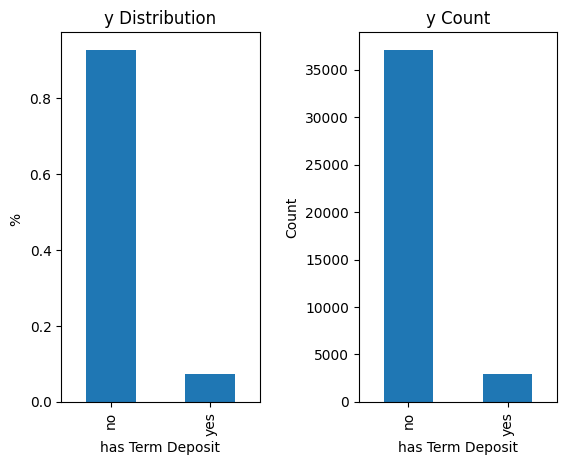

y
no     37104
yes     2896
Name: count, dtype: int64


In [ ]:
# creating subplot 1
plt.subplot(1,2,1)   # 1 row & 2 cols
#creating actual plot to be plotted
data['y'].value_counts(normalize=True).plot(kind='bar')
plt.title('y Distribution')
plt.xlabel('has Term Deposit')
plt.ylabel('% ')

# creating subplot 2
plt.subplot(1,2,2) # 1 row & 2 cols
#creating actual plot
data['y'].value_counts().plot(kind='bar')
plt.title('y Count')
plt.xlabel('has Term Deposit')
plt.ylabel('Count')

#adjusting plot spacing
plt.subplots_adjust(wspace=0.5)
plt.show()

#print counts of 'no' and 'yes'
print(data['y'].value_counts())

nearly 92% of the entries are 'no' for the target variable leaving ~ 8% of the entries with 'yes'

In [14]:
#populate the percentage of all 'job' categories
job_perc = data['job'].value_counts(normalize=True)*100
print(job_perc)

marital_perc = data['marital'].value_counts(normalize=True)*100
print(marital_perc)

married_data = data[data['marital'] == 'married']
print("Married w term deposit: ", married_data['y'].value_counts(normalize=True)*100)

single_data = data[data['marital'] == 'single']
print("Single with term deposit: ", single_data['y'].value_counts(normalize=True)*100)

divorced_data = data[data['marital'] == 'divorced']
print("Divorced with term deposit: ", divorced_data['y'].value_counts(normalize=True)*100)

job
blue-collar      23.4575
management       20.4150
technician       17.1300
admin            11.2075
services          9.7750
retired           3.5925
self-employed     3.5350
entrepreneur      3.5125
unemployed        2.7600
housemaid         2.7175
student           1.3100
unknown           0.5875
Name: proportion, dtype: float64
marital
married     60.9650
single      27.2225
divorced    11.8125
Name: proportion, dtype: float64
Married w term deposit:  y
no     93.939145
yes     6.060855
Name: proportion, dtype: float64
Single with term deposit:  y
no     90.568464
yes     9.431536
Name: proportion, dtype: float64
Divorced with term deposit:  y
no     91.724868
yes     8.275132
Name: proportion, dtype: float64


## Creating second subset dataset containing only the entries where 'y'='yes'

In [8]:
#subset dataset for only 'y'='yes' customers
data_yes = data[data['y'] == 'yes']

print(data_yes.shape)
print(data_yes.head(10))

#save this to a csv file
data_yes.to_csv('yes_term_deposit_customers.csv')


(2896, 14)
     age         job   marital  education default  balance housing loan  \
83    59       admin   married  secondary      no     2343     yes   no   
86    56       admin   married  secondary      no       45      no   no   
87    41  technician   married  secondary      no     1270     yes   no   
129   55    services   married  secondary      no     2476     yes   no   
168   54       admin   married   tertiary      no      184      no   no   
270   42  management    single   tertiary      no        0     yes  yes   
388   56  management   married   tertiary      no      830     yes  yes   
390   60     retired  divorced  secondary      no      545     yes   no   
446   39  technician    single    unknown      no    45248     yes   no   
457   37  technician   married  secondary      no        1     yes   no   

     contact  day month  duration  campaign    y  
83   unknown    5   may      1042         1  yes  
86   unknown    5   may      1467         1  yes  
87   unkno

looking into some of the category proportions of this 'yes to term deposit' customer dataset

In [18]:
job_perc = data_yes['job'].value_counts(normalize=True)*100
print(job_perc)

print()

marital_perc = data_yes['marital'].value_counts(normalize=True)*100
print(marital_perc)

print()

edu_perc = data_yes['education'].value_counts(normalize=True)*100
print(edu_perc)

print()

default_perc = data_yes['default'].value_counts(normalize=True)*100
print(default_perc)

print()

housing_perc = data_yes['housing'].value_counts(normalize=True)*100
print(housing_perc)

print()

loan_perc = data_yes['loan'].value_counts(normalize=True)*100
print(loan_perc)

job
management       23.342541
blue-collar      18.473757
technician       17.161602
admin            12.120166
services          8.218232
retired           5.214088
self-employed     3.867403
unemployed        3.314917
entrepreneur      3.038674
student           2.831492
housemaid         1.830110
unknown           0.587017
Name: proportion, dtype: float64

marital
married     51.035912
single      35.462707
divorced    13.501381
Name: proportion, dtype: float64

education
secondary    48.964088
tertiary     35.531768
primary      12.189227
unknown       3.314917
Name: proportion, dtype: float64

default
no     98.308011
yes     1.691989
Name: proportion, dtype: float64

housing
yes    50.552486
no     49.447514
Name: proportion, dtype: float64

loan
no     86.878453
yes    13.121547
Name: proportion, dtype: float64


of this dataset, where all entries are people WITH Term Deposit:  
the highest occuring job category is 'management'  
around 50.55% of people Do Have a housing loan ('housing'='yes')  

## Looking at the entries in the dataset with a negative balance !

In [7]:
#entries in data that have a negative number in the 'balance' feature
negative_balance = data[data['balance'] < 0]

print(negative_balance.shape)
print(negative_balance.head(10))

print(negative_balance['y'].value_counts(), "Percentage: ", negative_balance['y'].value_counts(normalize=True)*100)
print("Percentage values: ", negative_balance['job'].value_counts(normalize=True)*100)

(3731, 14)
    age            job   marital  education default  balance housing loan  \
25   44          admin   married  secondary      no     -372     yes   no   
28   46     management    single  secondary      no     -246     yes   no   
36   25    blue-collar   married  secondary      no       -7     yes   no   
37   53     technician   married  secondary      no       -3      no   no   
45   36          admin    single    primary      no     -171     yes   no   
46   58  self-employed   married   tertiary      no     -364     yes   no   
51   48     management  divorced   tertiary      no     -244     yes   no   
53   42          admin    single  secondary      no      -76     yes   no   
54   24     technician    single  secondary      no     -103     yes  yes   
94   57   entrepreneur  divorced  secondary      no      -37      no   no   

    contact  day month  duration  campaign   y  
25  unknown    5   may       172         1  no  
28  unknown    5   may       255         2 

## Investigate Multicollinearity

Need to convert all String entries into float or numerical entries because the built in .corr() function does not work with string datatype features

In [ ]:
#new dataframe with only feature columns
y_df = data[['y']]
feat_data = data.drop(['y'], axis=1)

print(y_df.shape)
print(feat_data.shape)


(40000, 1)
(40000, 13)


Need to convert all features with string entries into numerical entries

Data Dictionary I would like to follow for this change: https://docs.google.com/spreadsheets/d/1fAdu30CJhY9R2nUNCTeXGErbwKOmdL3ejTNxC8J4dpc/edit?gid=633377447#gid=633377447

Would One-Hot-Encoding be a better option for this task??

In [ ]:
#making correlation matrix
corr_matrix = feat_data.corr()
print(corr_matrix)

#visualizing
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'management'